In [1]:
import json
import matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame
from geojson import Feature, FeatureCollection, GeometryCollection
from pymongo import MongoClient

In [2]:
client = MongoClient(
    'mongodb://localhost:27017/',
    username='mongoadmin',
    password='pass',
    authSource='admin'
)

db = client.geodata
points = db.points

inpoint = points.find_one({"properties":{"name":"inpoint"}})
outpoint = points.find_one({"properties":{"name":"outpoint"}})

In [3]:
# Create features from files
with open('shapes/hlavna.geojson', 'r') as data:
    hlavna_data = json.loads(data.read())

hlavna = GeoDataFrame.from_features([hlavna_data])

inpoint = points.find_one({"properties":{"name":"inpoint"}})
point_in = GeoDataFrame.from_features([inpoint])

outpoint = points.find_one({"properties":{"name":"outpoint"}})
point_out = GeoDataFrame.from_features([outpoint])

<AxesSubplot:>

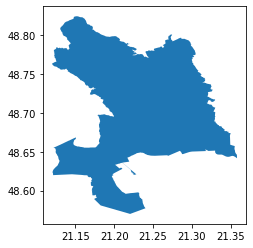

In [4]:
with open('shapes/kosice_region.geojson', 'r') as data:
    kosice_data = json.loads(data.read())

feature4 = GeometryCollection(kosice_data['geometries'])
kosice = GeoSeries([feature4])
kosice.plot()

<AxesSubplot:>

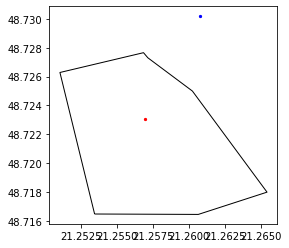

In [5]:
# Create simple plot hlavna and points
fig, ax = plt.subplots()
hlavna.plot(ax=ax, color='white', edgecolor='black')
point_in.plot(ax=ax, marker='o', color='red', markersize=5)
point_out.plot(ax=ax, marker='o', color='blue', markersize=5)

<AxesSubplot:>

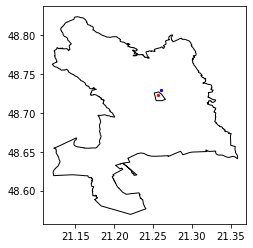

In [6]:
# Add kosice region to the plot
fig, ax = plt.subplots()
kosice.plot(ax=ax, color='white', edgecolor='black')
hlavna.plot(ax=ax, color='white', edgecolor='black')
point_in.plot(ax=ax, marker='o', color='red', markersize=5)
point_out.plot(ax=ax, marker='o', color='blue', markersize=5)


In [7]:
print(hlavna.intersects(point_in))
print(hlavna.intersects(point_out))

0    True
dtype: bool
0    False
dtype: bool


<AxesSubplot:>

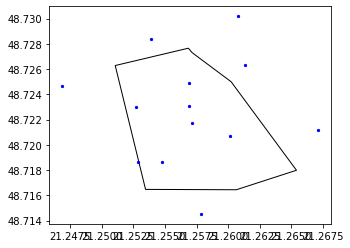

In [8]:
# Create simple plot hlavna and points
fig, ax = plt.subplots()
hlavna.plot(ax=ax, color='white', edgecolor='black')
result = points.find({})
all_points = GeoDataFrame.from_features(result)
all_points.plot(ax=ax, marker='o', color='blue', markersize=5)

In [28]:
# result = points.find({})
# print(result)
# all_points = GeoDataFrame.from_features(result)
# print(all_points)
print(hlavna)

for point in points.find({}):
    geopoint = GeoDataFrame.from_features([point])
    print("{}:{}".format(geopoint.name, hlavna.intersects(geopoint)))
    
# all_points.sindex.query_bulk(hlavna, predicate="intersects")


                                            geometry          name
0  POLYGON ((21.25342 48.71651, 21.26060 48.71648...  hlavnaregion
                    geometry    name
0  POINT (21.25691 48.72486)  point1:0    True
dtype: bool
                    geometry    name
0  POINT (21.26133 48.72633)  point2:0    False
dtype: bool
                    geometry    name
0  POINT (21.25391 48.72837)  point3:0    False
dtype: bool
                    geometry    name
0  POINT (21.24683 48.72463)  point4:0    False
dtype: bool
                    geometry    name
0  POINT (21.25717 48.72172)  point5:0    True
dtype: bool
                    geometry    name
0  POINT (21.26013 48.72073)  point6:0    True
dtype: bool
                    geometry    name
0  POINT (21.26713 48.72118)  point7:0    False
dtype: bool
                    geometry    name
0  POINT (21.25786 48.71452)  point8:0    False
dtype: bool
                    geometry    name
0  POINT (21.25284 48.71863)  point9:0    False
dtype: b